# Visualisation using

![Matplotlib](http://upload.wikimedia.org/wikipedia/en/5/56/Matplotlib_logo.svg)

# Notebook Setup (run me first!)

First, we apply a "magic command" to make plots appear "inline" inside the notebook

In [1]:
%matplotlib inline

In [2]:
import math
import os
from pathlib import Path
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Set the path to the git repository, it will be used later on to fetch data

In [3]:
# if you cd'd to the repo folder before launching the jupyter lab server this should be fine
#path_to_the_repo = os.getcwd() 
# Otherwise you'll have to set it manually
path_to_the_repo = "/home/torradeflot/Projects/PythonBootcamp"

# Auxiliary data: Spain power generation data 

Data from Red Eléctrica, retrieved from the public [REData API] (https://www.ree.es/es/apidatos).

Daily (raw) data 2014-2023 in kWh

In [4]:
daily_csv = os.path.join(path_to_the_repo, 'resources', 'power_sources_daily_2014_2023.csv')
df_daily = pd.read_csv(daily_csv, index_col=0)
df_daily.fillna(0, inplace=True)
df_daily.shape

(3652, 21)

In [5]:
df_daily.head(5)

Hydro  PumpedStorage     Nuclear       Coal  FuelGas  \
2014-01-01   73065.052       6970.160  146015.503  25240.655   -4.599   
2014-01-02   89171.545      23682.079  146147.546  37546.113   -4.825   
2014-01-03  102502.527      23882.275  146198.074  42672.054   -4.767   
2014-01-04  106840.706       8520.894  146270.916  30782.043   -4.626   
2014-01-05  117217.635      17345.744  121525.188  24606.925   -4.795   

            DieselEngines  GasTurbine  SteamTurbine  CombinedCycle  \
2014-01-01       8388.976    1481.931      6117.065      53534.600   
2014-01-02       8659.002    2325.496      7586.721      52322.227   
2014-01-03       8734.932    2196.861      8043.085      51254.562   
2014-01-04       8427.393    1620.337      6875.346      32862.777   
2014-01-05       8346.540    1564.459      6511.197      41422.898   

            Hydroeolian  ...  SolarPhotovoltaic  ThermalSolar  \
2014-01-01          0.0  ...           7631.801       519.532   
2014-01-02          0.0  ...           3836.442       177.784   
2014-01-03          0.0  ...           8673.179      1157.242   
2014-01-04          0.0  ...           8813.196       478.934   
2014-01-05          0.0  ...          10878.603      2137.221   

            OtherRenewables  Cogeneration  NonRenewableWaste  RenewableWaste  \
2014-01-01        11897.240     54043.077          4616.7525       1877.3425   
2014-01-02        11564.649     79006.632          4743.0875       1831.7535   
2014-01-03        11891.476     85658.228          4657.5170       1599.8520   
2014-01-04        12103.260     65312.961          4375.2160       1519.4580   
2014-01-05        11775.113     64800.182          4462.8175       1729.6255   

            TotalGeneration  year  month  day  
2014-01-01       659291.293  2014      1    1  
2014-01-02       739360.656  2014      1    2  
2014-01-03       747939.175  2014      1    3  
2014-01-04       749876.430  2014      1    4  
2014-01-05       694993.941  2014      1    5  

[5 rows x 21 columns]

Compute monthly aggregates in kwH

In [6]:
df_monthly = df_daily.groupby(['year', 'month'], as_index=False).sum().drop('day', axis=1)
df_monthly['date'] = pd.to_datetime(
    df_monthly['year'].astype(str) + '-' + df_monthly['month'].astype(str) + '-01'
)

In [7]:
df_monthly.head(5)

year  month        Hydro  PumpedStorage      Nuclear         Coal  FuelGas  \
0  2014      1  4261392.824     443678.644  4526062.779  2293159.522 -148.739   
1  2014      2  5763251.167     369221.991  4721937.495   884091.427 -134.753   
2  2014      3  5293018.012     354775.253  5286792.276  1294242.753 -140.900   
3  2014      4  4986856.873     361188.617  5056306.647  1385564.216 -107.327   
4  2014      5  2826765.233     275956.466  4336633.309  3367749.593 -109.851   

   DieselEngines  GasTurbine  SteamTurbine  ...  Hydroeolian         Wind  \
0     275357.985   54877.485    216697.507  ...          0.0  6570961.682   
1     253341.742   57405.486    176742.116  ...          0.0  5917525.957   
2     255615.002   62648.045    150180.230  ...          0.0  5096447.600   
3     239877.290   65461.729    152334.800  ...          0.0  3978164.753   
4     257606.270   71625.317    145996.242  ...          0.0  4177875.518   

   SolarPhotovoltaic  ThermalSolar  OtherRenewables  Cogeneration  \
0         377518.728     79800.655       380895.587   2550462.421   
1         434383.400    103264.502       293997.433   1876056.059   
2         735970.624    385175.316       305878.249   1831179.497   
3         791985.906    435527.059       266467.509   1618663.435   
4         924515.196    729935.555       330192.006   1931174.991   

   NonRenewableWaste  RenewableWaste  TotalGeneration       date  
0        143220.5220      49339.6480     2.403327e+07 2014-01-01  
1        122564.6445      35868.0395     2.253211e+07 2014-02-01  
2        112142.4080      32435.4660     2.279159e+07 2014-03-01  
3        137938.5380      51170.3200     2.103158e+07 2014-04-01  
4        162033.5560      60551.0040     2.131005e+07 2014-05-01  

[5 rows x 21 columns]

Identify renewable vs non-renewable sources

In [8]:
renewable = [
    'Hydro',
    'Hydroeolian',
    'Wind',
    'SolarPhotovoltaic',
    'ThermalSolar',
    'OtherRenewables',
    'RenewableWaste'
]
non_renewable = [
    'PumpedStorage',
    'Nuclear',
    'Coal',
    'FuelGas',
    'DieselEngines',
    'GasTurbine',
    'SteamTurbine',
    'CombinedCycle',
    'Cogeneration',
    'NonRenewableWaste'
]

# Examples
## Simple example

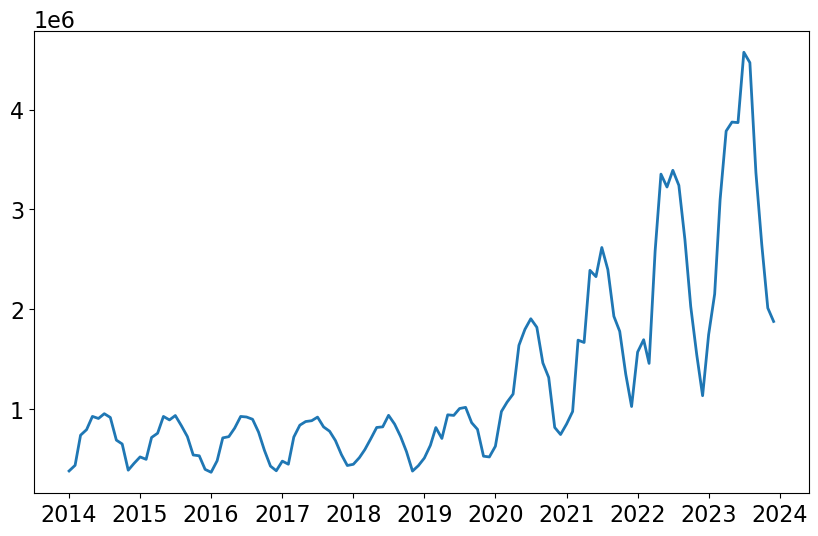

In [9]:
plt.plot(
    df_monthly.date, # X axis
    df_monthly['SolarPhotovoltaic'] # Y axis
);

## Full example

<img src="resources/matplotlib_figure_anatomy.png" width="50%"></img>

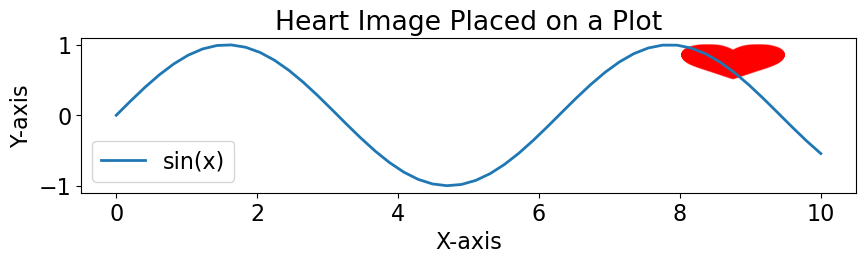

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Create some sample plot data
x = np.linspace(0, 10, 50)
y = np.sin(x)

# 2. Load the heart image (make sure 'heart.png' exists in your directory)
try:
    img = mpimg.imread('resources/heart.png')
except FileNotFoundError:
    print("Error: heart.png not found. Please provide a heart image file.")

# 3. Create a figure and axes
fig, ax = plt.subplots()

# 4. Plot the existing data
ax.plot(x, y, label='sin(x)')

# 5. Get the current x and y axis limits
# This step is crucial to prevent Matplotlib from automatically scaling the axes
current_xlim = ax.get_xlim()
current_ylim = ax.get_ylim()

# 6. Set the coordinates for the image placement
# For example, let's place the image in the top-right corner of the plot
# The extent is specified in data coordinates (x_min, x_max, y_min, y_max)
image_xmin = 8.0
image_xmax = 9.5
image_ymin = 0.5
image_ymax = 1.0

# 7. Add the image to the plot using the extent parameter
ax.imshow(img, extent=[image_xmin, image_xmax, image_ymin, image_ymax])

# 8. Restore the original axis limits
# This prevents the plot from zooming out to include the full image bounds
ax.set_xlim(current_xlim)
ax.set_ylim(current_ylim)

# 9. Optional: Add a legend, title, etc.
ax.set_title("Heart Image Placed on a Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.legend()

plt.show()

Text(0.5, 1.0, 'Energy production by source 2013-2024')

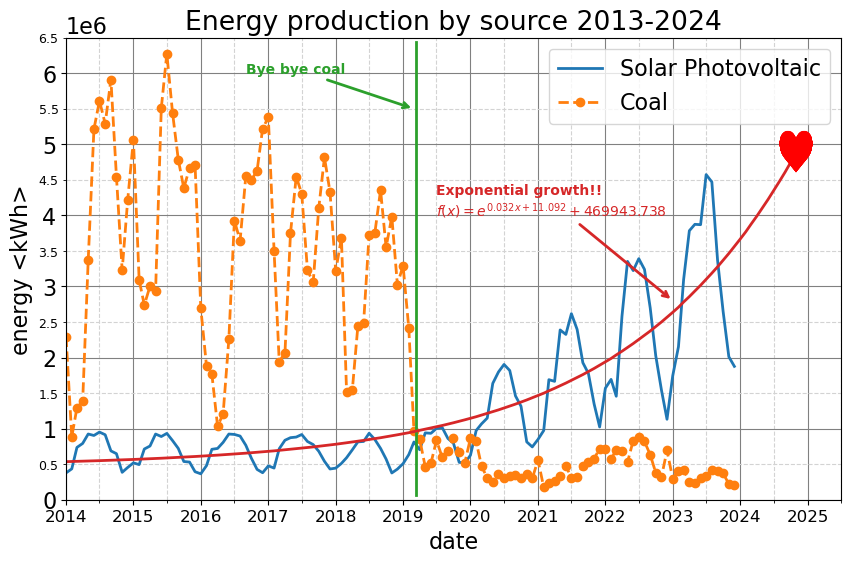

In [12]:
from scipy.optimize import curve_fit
import matplotlib.dates as mdates
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load the PNG file as a NumPy array
img = mpimg.imread('resources/heart.png')

plt.plot(
    df_monthly.date, df_monthly['SolarPhotovoltaic'],
    color='tab:blue', label='Solar Photovoltaic'
)

plt.plot(
    df_monthly.date, df_monthly['Coal'], color='tab:orange',
    linestyle='--', marker='o', label='Coal'
)

# Annotate coal production drop
plt.axvline(np.datetime64('2019-03-13'), ymin=0.01, ymax=0.99, color='tab:green')
plt.annotate(
    'Bye bye coal', [np.datetime64('2019-03-01'), 5.5e6],
    xytext=[np.datetime64('2016-09-01'), 6e6], arrowprops={'arrowstyle':'->', 'color': 'tab:green', 'linewidth': 2},
    color='tab:green', fontweight='bold', fontsize=10
)

# Fitting an exponential to the photovoltaic production
def f(x, a, b, c):
    return np.exp(a*x + b) + c
y = df_monthly['SolarPhotovoltaic']
x = np.arange(len(y))
params, covariance_matrix = curve_fit(f, x, y)

xi = np.arange(len(y) + 12)
yi = df_monthly.date.tolist()
yi += [np.datetime64(f'{y}-{m:02.0f}-01') for y in (2024,) for m in range(1, 13) ]
plt.plot(yi, f(xi, *params), color='tab:red')

plt.annotate(
    'Exponential growth!!\n$f(x)=e^{{{0:.3f}x+{1:.3f}}} + {2:.3f}$'.format(*params),
    [np.datetime64('2023-01-01'), 2.8e6],
    xytext=[np.datetime64('2019-07-01'), 4e6], arrowprops={'arrowstyle':'->', 'color': 'tab:red', 'linewidth': 2},
    color='tab:red', fontsize=10, fontweight='bold'
)
#ax = plt.gca()
#current_xlim = ax.get_xlim()
#current_ylim = ax.get_ylim()
plt.imshow(
    img, extent=[
        mdates.date2num(np.datetime64('2024-08-01')),
        mdates.date2num(np.datetime64('2025-02-01')), 4.6e6, 5.2e6],
    aspect='auto',
    zorder=40
)
#ax.set_xlim(current_xlim)
#ax.set_ylim(current_ylim)

# Ticks and grid
plt.yticks(np.arange(7)*1e6, minor=False)
plt.yticks((np.arange(7) + 0.5)*1e6, labels=[f'{s + 0.5:.1f}' for s in range(7)], minor=True, fontsize=9)
plt.xticks(np.arange('2014', '2026', dtype='datetime64[Y]'), minor=False, fontsize=12)
ax = plt.gca()
year_formatter = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(year_formatter)
plt.xticks([np.datetime64(f'{i}-07-01')for i in range(2014, 2026)], minor=True)
plt.grid(which='major', color='grey', linestyle='-')
plt.grid(which='minor', color='lightgrey', linestyle='--')

# Labels and legend
plt.xlabel('date')
plt.ylabel('energy <kWh>')
plt.legend()
plt.title('Energy production by source 2013-2024')

<a id=different_styles></a>
# Styling your plots

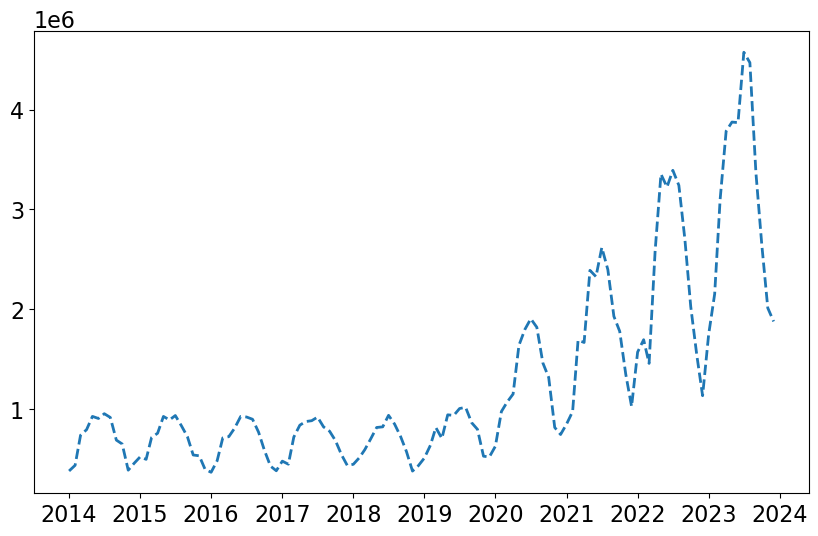

In [23]:
plt.plot(
    df_monthly.date, # X axis
    df_monthly['SolarPhotovoltaic'], # Y axis
    '--'
)

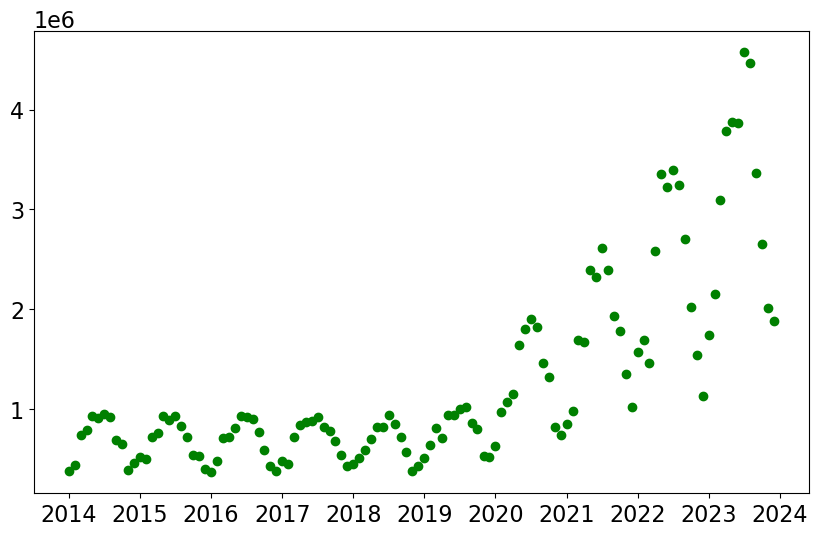

In [35]:
plt.plot(
    df_monthly.date, # X axis
    df_monthly['SolarPhotovoltaic'], # Y axis
    'go'
)
# plt.plot(..., color='green', marker='o', linestyle='');   # same thing!

In [34]:
months = range(1, 13)
mask_2023 = df_monthly.year == 2023
nuclear = df_monthly[ mask_2023]['Nuclear']
hydro = df_monthly[ mask_2023]['Hydro']

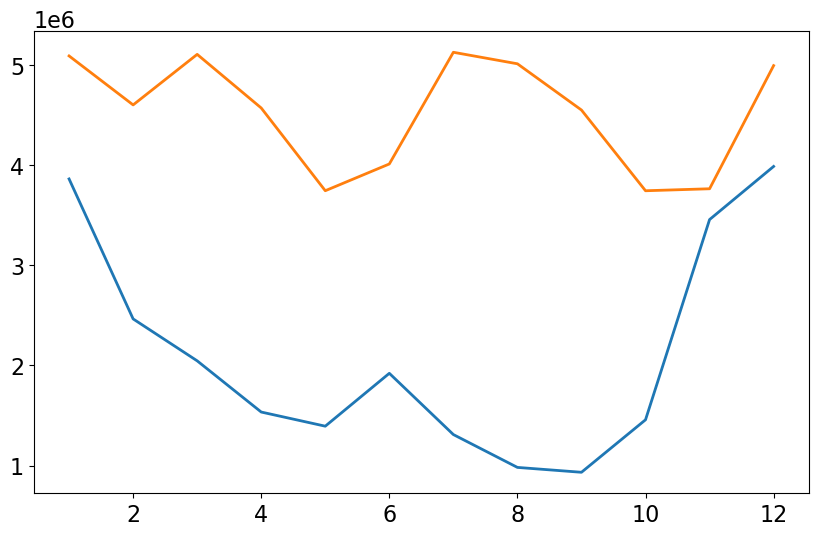

In [35]:
plt.plot(months, hydro)#, c='0.2')
plt.plot(months, nuclear)#, color='0.2')
#plt.ylabel('Energy generation $MWh$')

#plt.fill_between(months, hydro, nuclear, color='lightgray')
#plt.grid(linestyle='--')
'''
month_names = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

plt.xticks(
    months,
    month_names,
    rotation=45,
    rotation_mode='anchor',
    horizontalalignment='right',  # or ha
    verticalalignment='top',      # or va
);
''';

<a id=exercise_1></a>
# Exercise 1

Generate a line plot with the daily data from 2023 of 3 energy sources

With these characteristics:
* All lines in grey tones
* different markers or line types for each line
* with a legend located at the 'upper left'


In [29]:
# %load -r 44-49 /home/torradeflot/Projects/PythonBootcamp/session_3_plotting/matplotlib_solutions.py

<a id=histograms></a>
# Other kinds of plots

## 1D Histograms

In [ ]:
plt.hist?

The daily photovoltaic solar generation

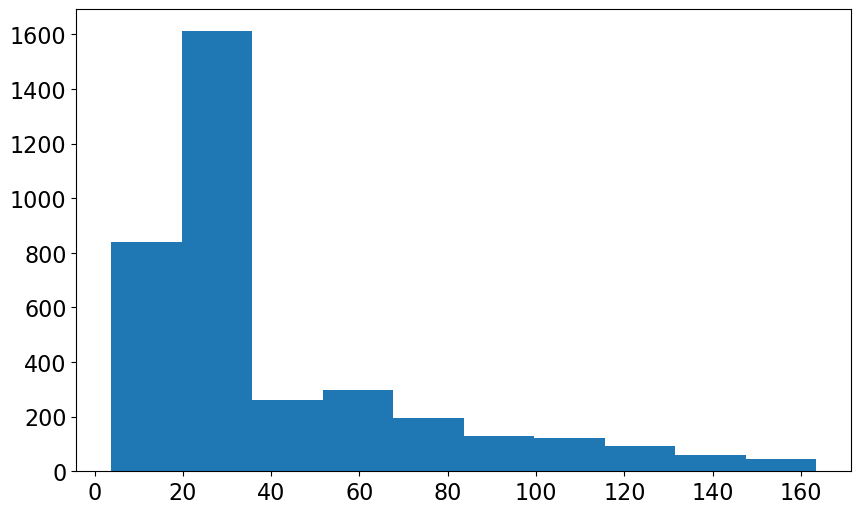

In [38]:
phot_counts, phot_bins, _ = plt.hist(df_daily['SolarPhotovoltaic']/1e3)

<a id=histogram_2d></a>
## 2D Histograms

In [ ]:
plt.hist2d?

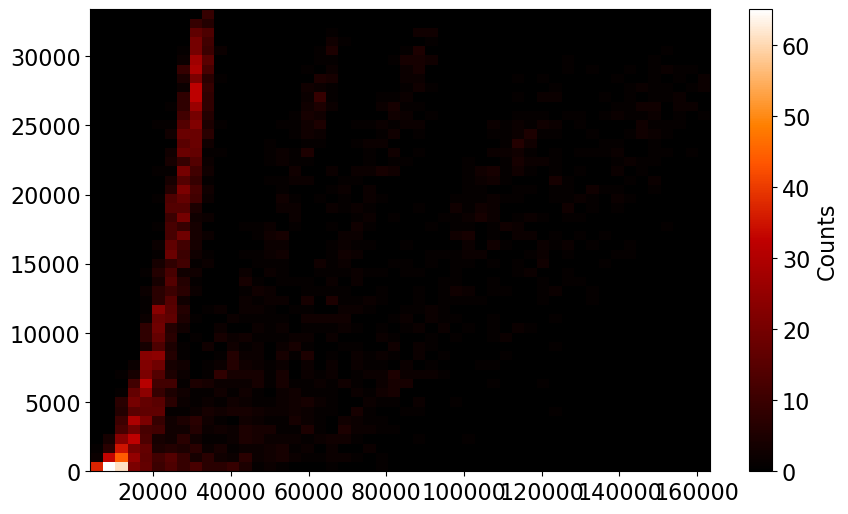

In [41]:
x = df_daily['SolarPhotovoltaic']
y = df_daily['ThermalSolar']

hist_output = plt.hist2d(x, y, bins=50, cmap='gist_heat') # try different color maps: viridis(default), inferno, gist_heat
#plt.hist2d(x, y, bins=50)
# plt.hist2d(x, y, bins=[25, 50], range=[[-10, 14], [-5, 7]])

plt.colorbar(label='Counts');

<a id=bar></a>
## Bar plots

<a id=simple_bar></a>
### Simple bar plot

In [ ]:
plt.bar?

<BarContainer object of 10 artists>

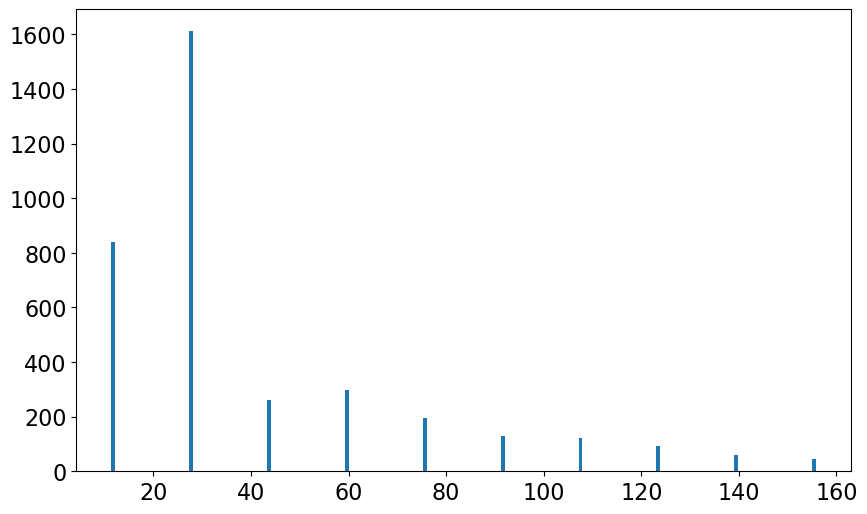

In [42]:
# Reusing the data from the 1D histogram
centers = (phot_bins[:-1] + phot_bins[1:])/2.
plt.bar(centers, phot_counts)

# Not exactly the plot we had previously
# We have to set the width of the bar to the width of the bin
#bin_width = phot_bins[1:] - phot_bins[:-1]
#plt.bar(centers, phot_counts, bin_width)

<a id=multiple_bar></a>
### Multiple bar plot

In [43]:
power_labels = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

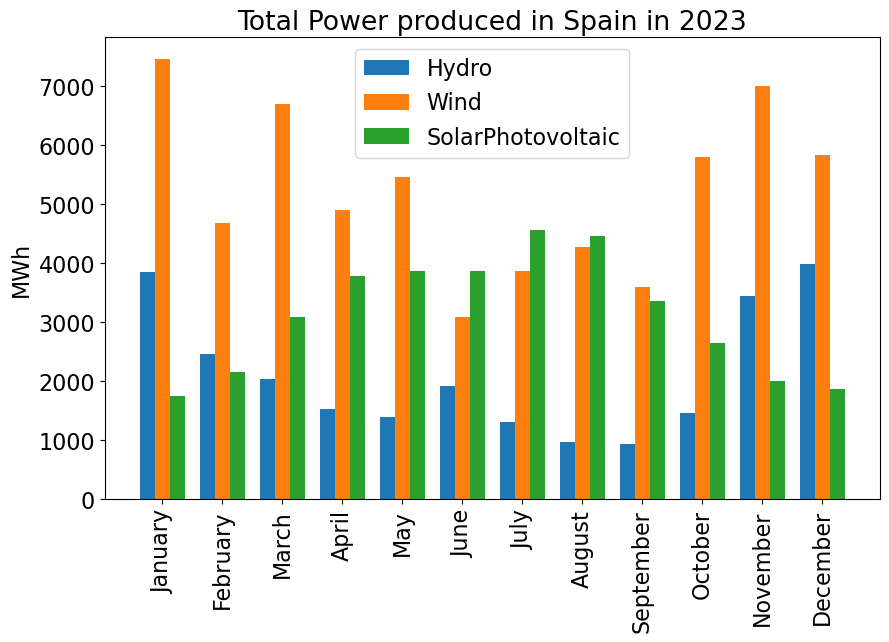

In [45]:
year = 2023
mask_year = df_monthly.year == year
sources_list = ['Hydro', 'Wind', 'SolarPhotovoltaic']
n_sources = len(sources_list)
for ind, source in enumerate(sources_list):
    plt.bar(np.arange(1, 13) + (ind - 1)/(n_sources + 1),
            df_monthly[mask_year][source]/1000,
            width=1/(n_sources + 1),
            label=source)
plt.xticks(np.arange(1, 13), power_labels, rotation=90)
plt.title(f'Total Power produced in Spain in {year}')
plt.ylabel('MWh')
plt.legend();

<a id=stacked_bar></a>
### Stacked bar plot

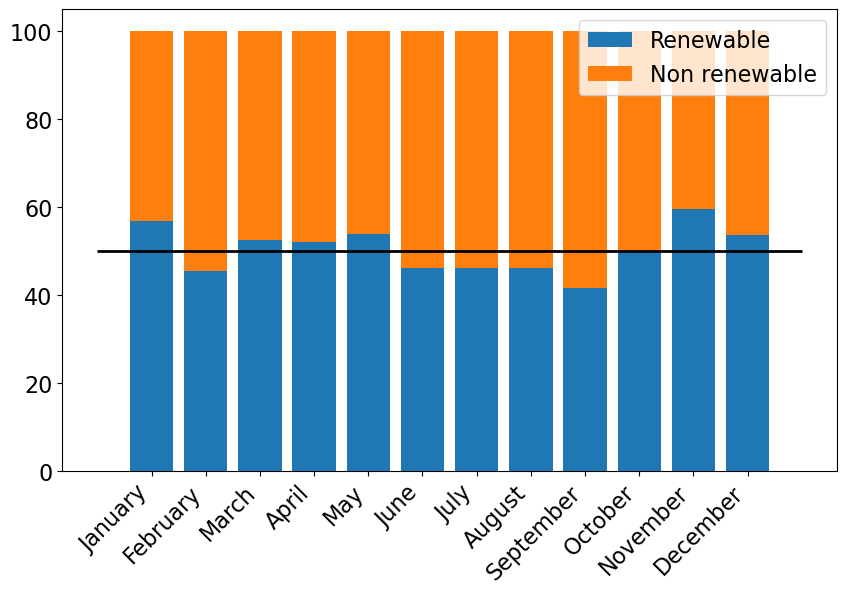

In [46]:
year = 2023
year_mask = df_monthly.year == year

total_df = df_monthly.loc[year_mask, renewable + non_renewable].sum(axis=1)
renewable_df = 100*df_monthly.loc[year_mask, renewable].sum(axis=1)/total_df
non_renewable_df = 100*df_monthly.loc[year_mask, non_renewable].sum(axis=1)/total_df

plt.bar(range(1, 13), renewable_df, label='Renewable')
plt.bar(range(1, 13), non_renewable_df, bottom=renewable_df, label='Non renewable')

plt.xticks(range(1, 13), power_labels, rotation=45, ha='right')
plt.hlines(50, 0, 13, colors='k')
plt.legend()

#plt.yticks([]);

<a id=scatter></a>
## Scatter plots

In [ ]:
plt.scatter?

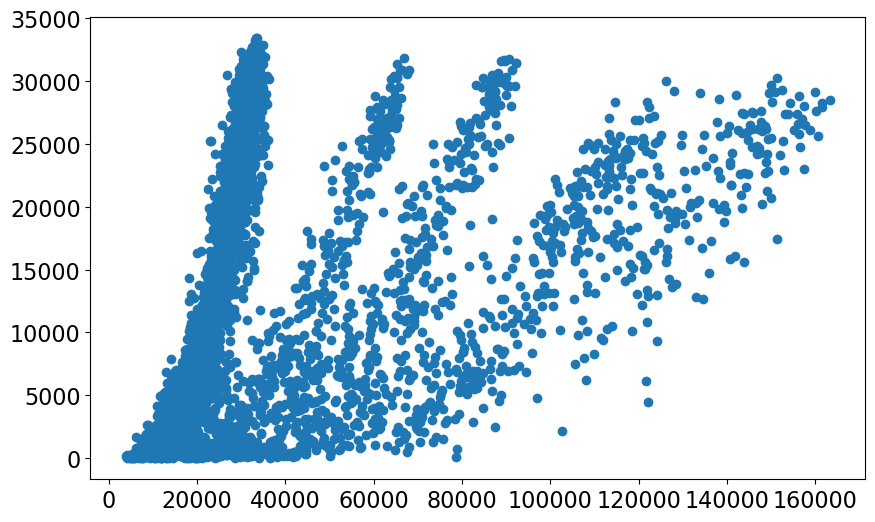

In [39]:
#plt.scatter(df_daily['Wind'], df_daily['Hydro'])
plt.scatter(df_daily['SolarPhotovoltaic'], df_daily['ThermalSolar'])

<a id=architecture></a>
# matplotlib architecture

Up to this point, we have only used the implicit *pyplot* interface. It's a MATLAB-like interface that provides convenient methods for easy plotting. But it has some drawbacks:

* It's not very pythonic (python is OO)
* No idea what's happening in the background

This interface is OK for online plotting, because it's simple, but it is not convenient for other purposes, like embedding plots into a program. For all other purposes, the OO interface should be preferred. Using it, our code will be more verbose, but also more explanatory, and we'll have more control on what it's doing.


In order to introduce the OO API, it's convenient that we have some knowledge of matplotlib's architecture.

The top-level matplotlib object that contains and manages all of the elements in a given graphic is called the **Figure**.

To achieve the manipulation and rendering of this objects, matplotlib is structured in three layers:
* *Backend*: It's the one that actually draws the Artists on the canvas.
* *Artist Layer*: Are the things that have to be plotted. The figure, lines, axis, bars, ...
* *Scripting Layer (pyplot)*: Light scripting interface we have alredy shown


## Artists layer

Everything you see in a plot is an Artist instance. This layer is a hierarchy of objects with the **Figure** sitting on top of it.

<table><tr>
<td><img src="resources/artists_figure.png"></img></td>
<td><img src="resources/artists_tree.png"></img></td>
</tr>
</table>


Some more detail ([directly from the matplotlib documentation](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure))

### Figure
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. A figure can have any number of Axes.

### Axes
This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects.

The Axes class and it's member functions are the primary entry point to working with the OO interface.

### Axis
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks).

Figure(1000x600)
    Rectangle(xy=(0, 0), width=1, height=1, angle=0)
    Axes(0.125,0.11;0.775x0.77)
        Line2D(ay)
        Spine
        Spine
        Spine
        Spine
        XAxis(125.0,65.99999999999999)
            Text(0.5, 0, 'lolay')
            Text(1, 0, '')
        YAxis(125.0,65.99999999999999)
            Text(0, 0.5, 'lolá')
            Text(0, 0.5, '')
        Text(0.5, 1.0, '')
        Text(0.0, 1.0, '')
        Text(1.0, 1.0, '')
        Legend
            FancyBboxPatch((0, 0), width=1, height=1)
        Rectangle(xy=(0, 0), width=1, height=1, angle=0)


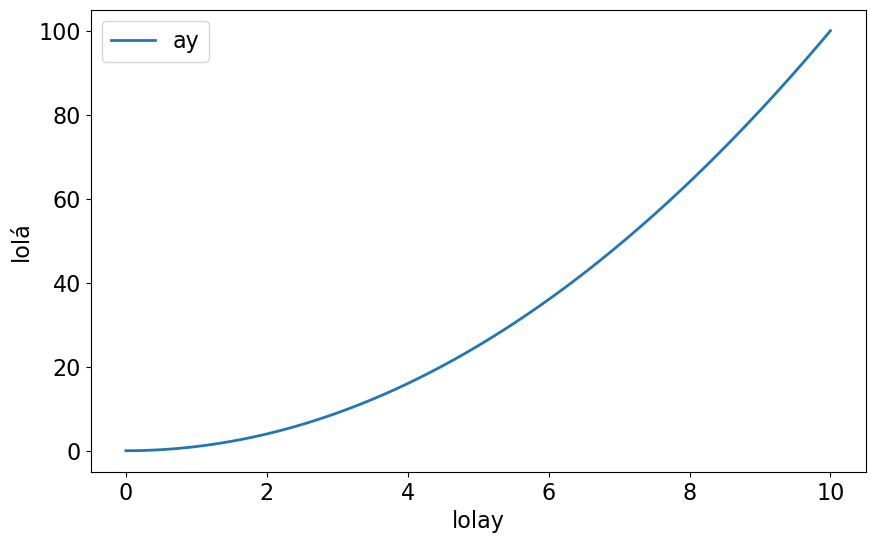

In [40]:
x = np.linspace(0, 10, 100)
y = x**2
plt.plot(x, y, label='ay')
plt.xlabel('lolay')
plt.ylabel('lolá')
plt.legend()

# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0, max_depth=8):
    if depth < max_depth and isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
fig = plt.gcf()
rec_gc(fig)

## The Object Oriented API

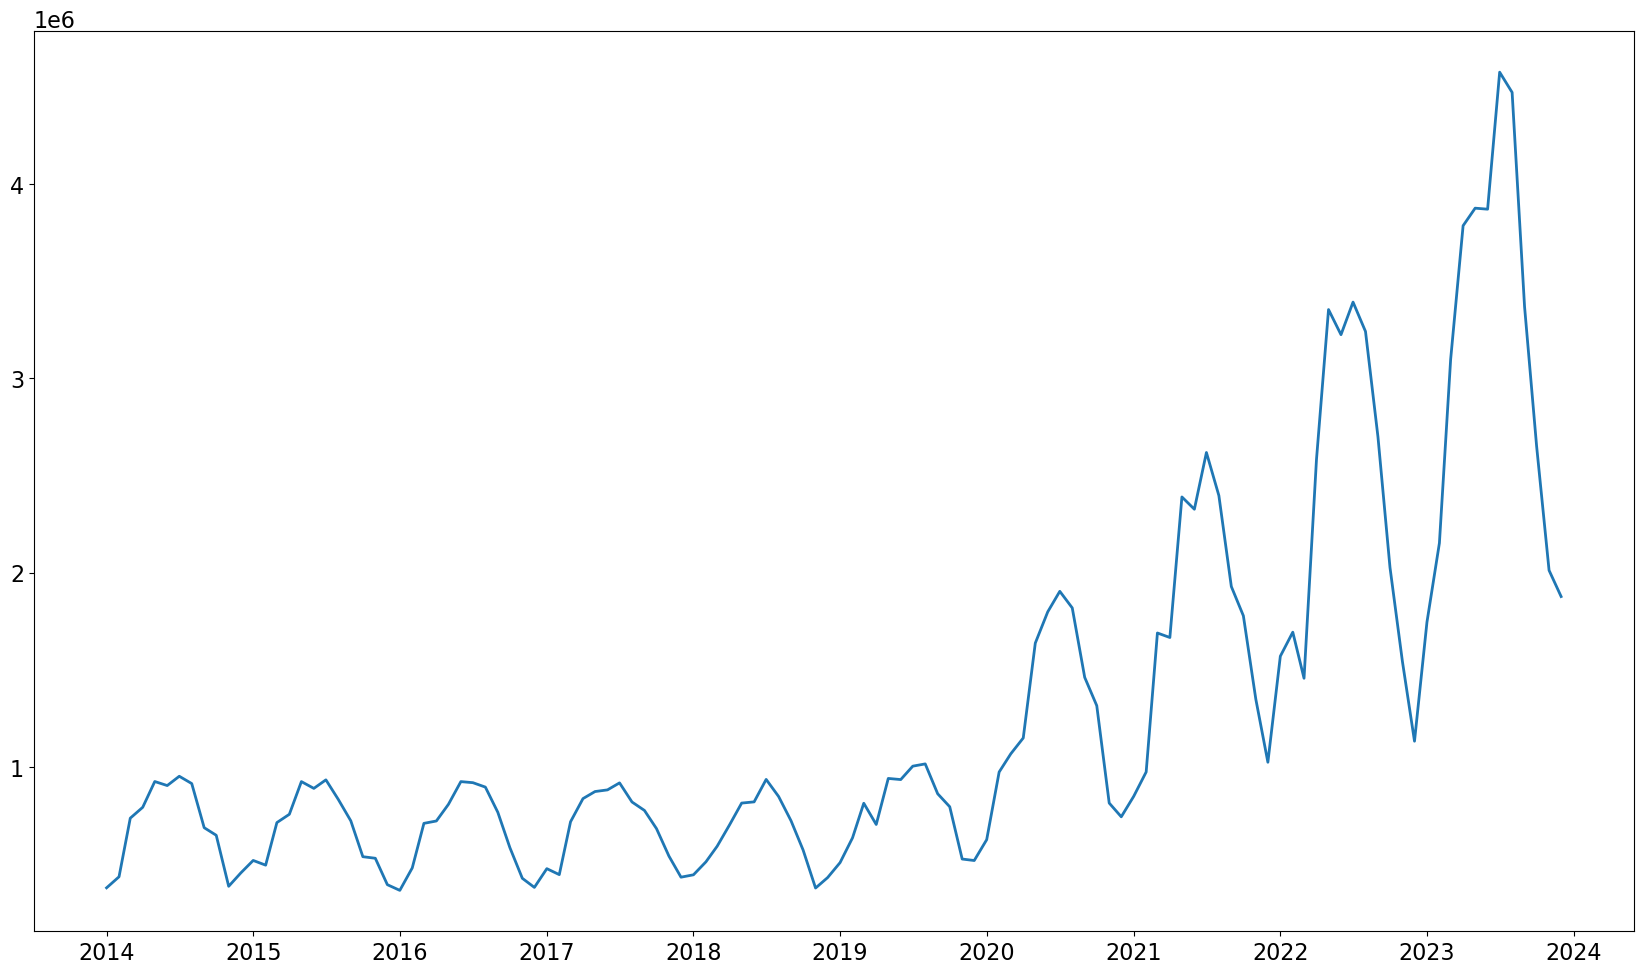

In [41]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df_monthly.date, df_monthly['SolarPhotovoltaic'])

Both APIs can be connected through the `pyplot.gcf` and `pyplot.gca` methods.

Is this the same? True



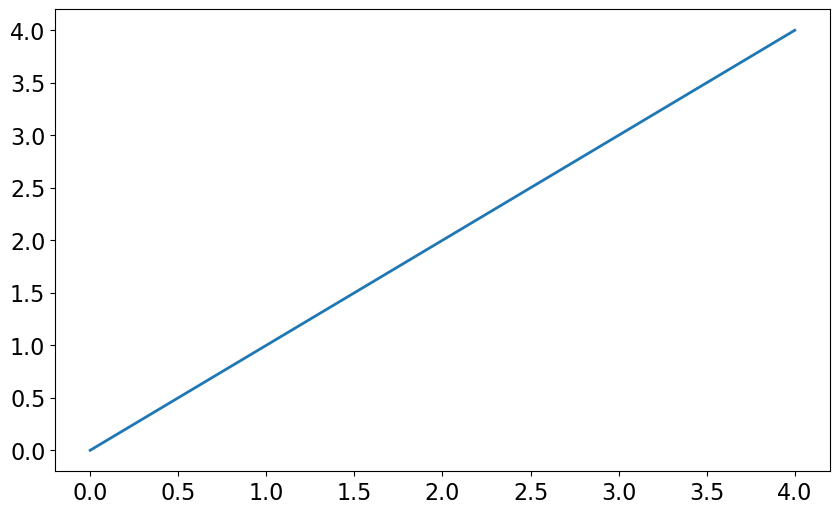

In [50]:
x = np.arange(5)
plt.plot(x, x)

fig = plt.gcf()
ax = plt.gca()
print('Is this the same? {}\n'.format(ax == fig.get_children()[1]))

## Backend

In [51]:
plt.get_backend()

'module://matplotlib_inline.backend_inline'

When using the inline backend, the current figure is renderd in cell execution.

New cells will contain new figures.

This behaviour may be different with other backends.

In [52]:
new_fig = plt.gcf()
print('old figure exits and is a {}'.format(type(fig)))
print('new figure exits and is a {}'.format(type(new_fig)))
print('But are they the same instance? {}'.format(fig == new_fig))

old figure exits and is a <class 'matplotlib.figure.Figure'>
new figure exits and is a <class 'matplotlib.figure.Figure'>
But are they the same instance? False


<Figure size 1000x600 with 0 Axes>

<a id=multiple_plots></a>
# Multiple plots in the same figure

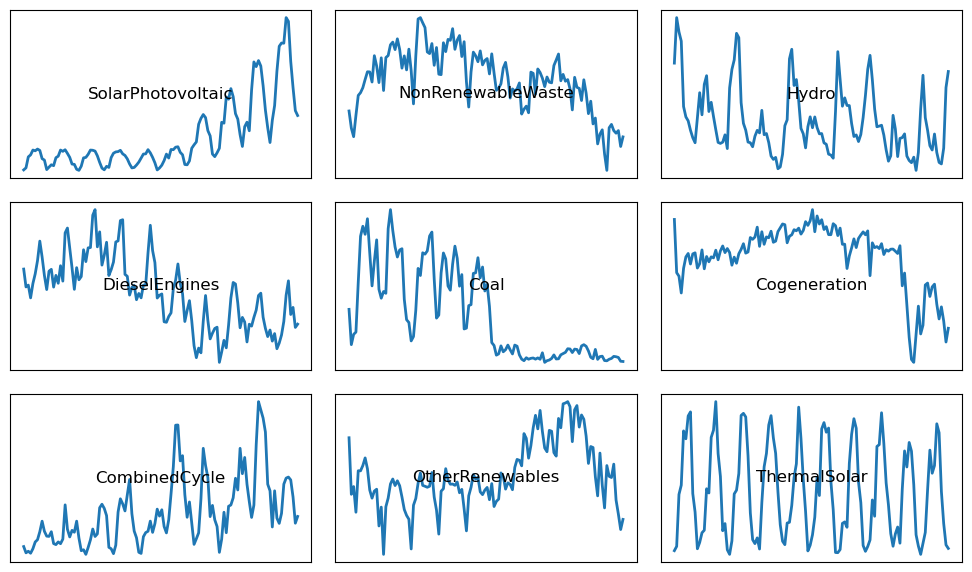

In [53]:
sources_sample = random.sample(renewable + non_renewable, 9)

# subplot arguments: # of rows, # of columns, plot index (row * (#cols) + col)
for i in range(9):
    ax = plt.subplot(3, 3, i + 1) # the same as fig.add_subplot
    x = df_monthly[sources_sample[i]]
    ax.plot(x)
    x_center = np.array(ax.get_xlim()).sum()/2
    y_center = np.array(ax.get_ylim()).sum()/2.
    ax.text(x_center, y_center, sources_sample[i], ha='center', va='center', fontsize=12)

    # Remove the ticks for cleaner plotting
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout() # When doing multiple plots you should almost always use this command

<a id=shared_axis></a>
## Subplots / Shared Axes

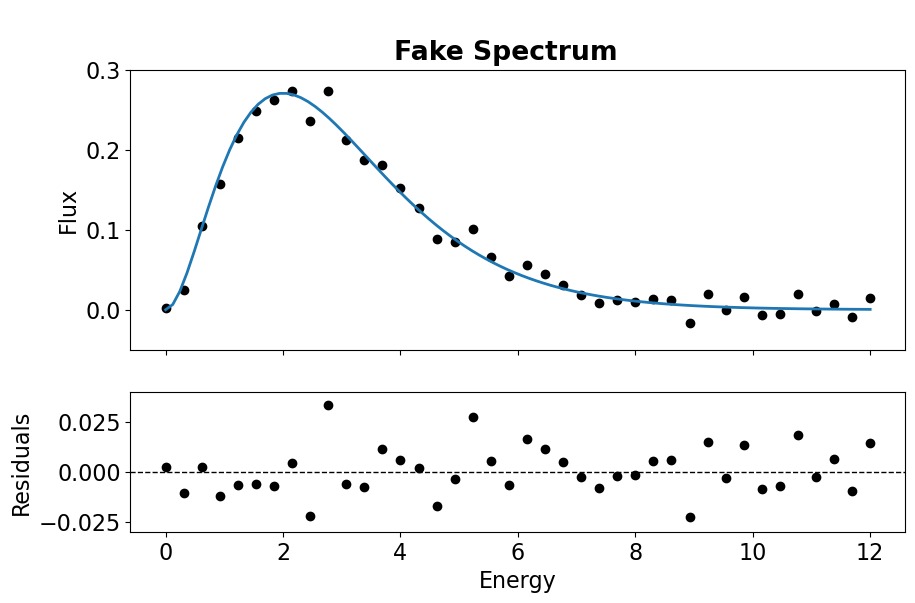

In [56]:
def poisson(x, k):
    return np.exp(-x)*x**k / math.factorial(k)

x = np.linspace(0, 12, 40)
y = poisson(x, 2)
y_noise = y + np.random.normal(0, 0.01, len(y))
z = np.linspace(0, 12, 100)

gridspec = {'height_ratios': [2, 1]}
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=gridspec)

ax1.plot(x, y_noise, 'ko')
ax1.plot(z, poisson(z, 2))
ax1.set_ylim(-0.05, 0.30)
ax1.set_ylabel('Flux')
#ax1.set_yticks(ax1.get_yticks()[1:])    # remove bottom y-tick

ax2.plot(x, y_noise - y, 'ko')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Energy')
ax2.set_ylim(-0.03, 0.04)
ax2.set_ylabel('Residuals')
#ax2.set_yticks(ax2.get_yticks()[:-2])   # remove top y-tick

#fig.subplots_adjust(hspace=0)
fig.suptitle('\nFake Spectrum', fontweight='bold');

<a id=gridspec></a>
## Using Gridspec

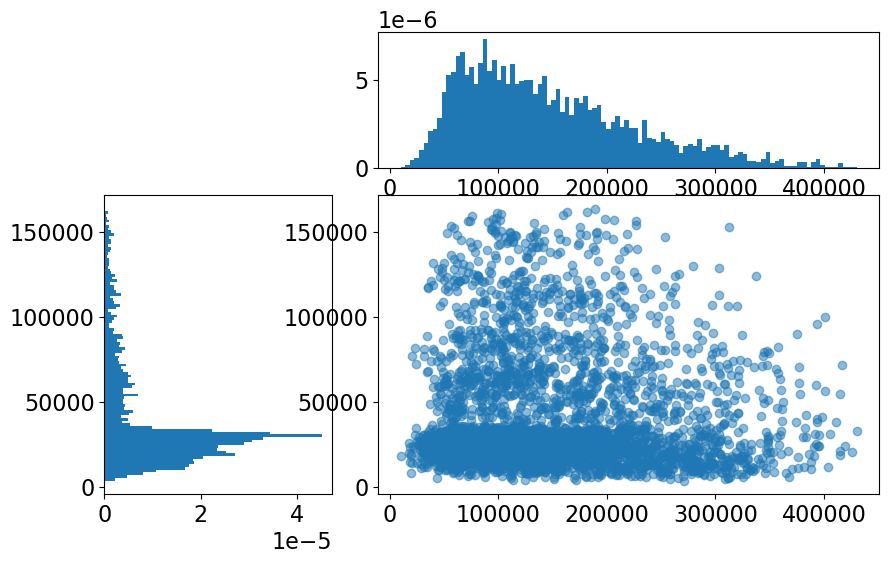

In [57]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

fig = plt.figure()
gspec = gridspec.GridSpec(3, 3) #, wspace=0.05, hspace=0.05)

top_histogram = fig.add_subplot(gspec[0, 1:])
side_histogram = fig.add_subplot(gspec[1:, 0])
lower_right = fig.add_subplot(gspec[1:, 1:])

# Data from daily energy generation
X = df_daily['Wind']
Y = df_daily['SolarPhotovoltaic']

# Normed histograms counts add up to 1, they resemble a probability density function
top_histogram.hist(X, bins=100, density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
# flip the side histogram's x axis
#side_histogram.invert_xaxis()
lower_right.scatter(X, Y, alpha=0.5)

# Remove the picks in-between
#top_histogram.set_xticks([])
#lower_right.set_yticks([])
#top_histogram.set_yticks(top_histogram.get_yticks()[1:])
#side_histogram.set_xticks(side_histogram.get_xticks()[1:]);

<a id=inset_plots></a>
## Inset Plots (plot inside a plot)

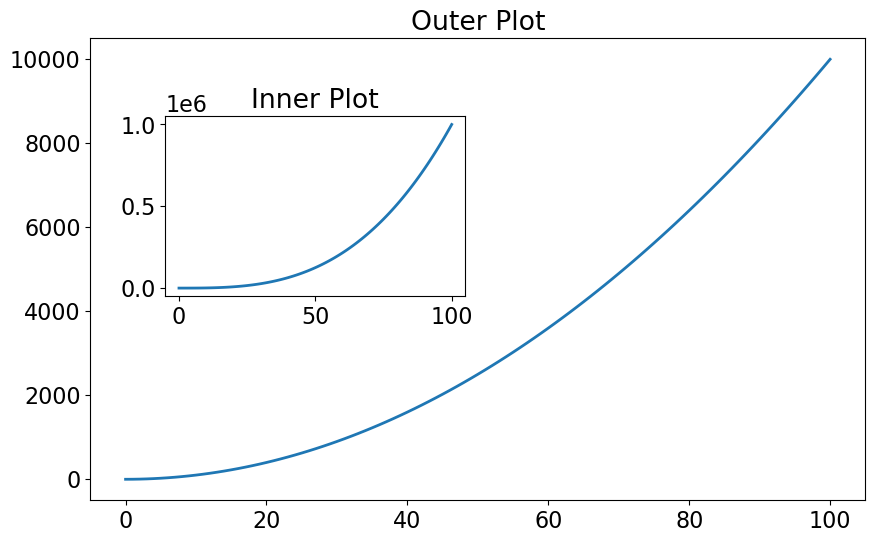

In [58]:
x = np.linspace(0, 100, 101)

plt.plot(x, x**2)
plt.title("Outer Plot")

# axes coordinates: (0,0) is lower left, (1,1) upper right
plt.axes([0.2, 0.45, 0.3, 0.3])
plt.plot(x, x**3)
plt.title("Inner Plot");

<a id=exercise_2></a>
## Exercise 2

Generate 3 differents random samples.

Plot them as normalized 1D histograms in a figure with 3 axes in 1 column, with shared x-axis and y-axis.

Put the name of the distribution somewhere in the axes so it can be identified.

There have to be no x-ticks in the top 2 axes and no vertical space between them.

Remove y-ticks.

In [42]:
#%load -r 73-88 {path_to_the_repo}/matplotlib/matplotlib_solutions.py

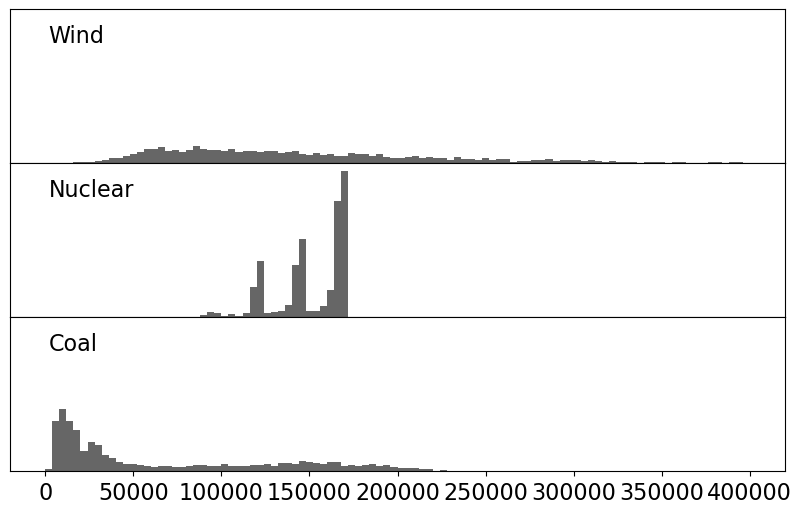

In [62]:
# %load -r 73-88 /home/torradeflot/Projects/PythonMasterIFAE/matplotlib/matplotlib_solutions.py
s1 = df_daily['Wind']
s2 = df_daily['Nuclear']
s3 = df_daily['Coal']

bins = np.linspace(0, 400000, 101)

fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, sharex=True, sharey=True, gridspec_kw={'hspace':0})
ax1.hist(s1, color='0.4', bins=bins, density=True)
ax2.hist(s2, color='0.4', bins=bins, density=True)
ax3.hist(s3, color='0.4', bins=bins, density=True)

ax1.text(0.05, 0.9,'Wind', ha='left', va='top', transform=ax1.transAxes)
ax2.text(0.05, 0.9,'Nuclear', ha='left', va='top', transform=ax2.transAxes)
ax3.text(0.05, 0.9,'Coal', ha='left', va='top', transform=ax3.transAxes)
for ax in fig.get_axes():
    ax.set_yticks([])

# Other plot types

##  Images

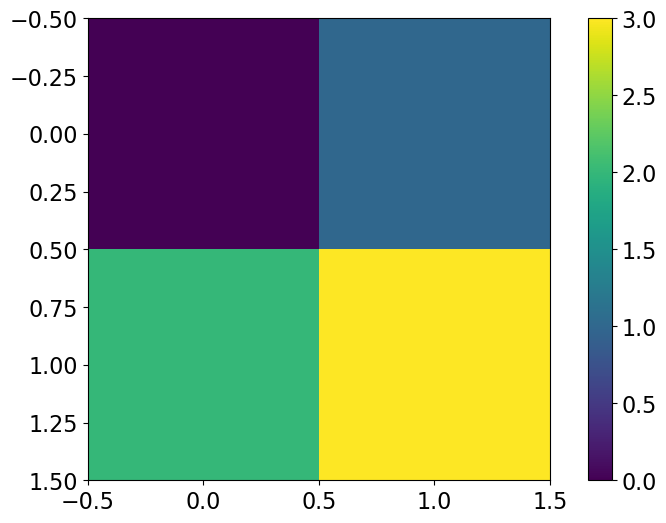

In [63]:
n_rows = 2
n_cols = 2
m = np.array([[n_rows*i + j for j in range(n_cols)] for i in range(n_rows)])
plt.imshow(m)
plt.colorbar();

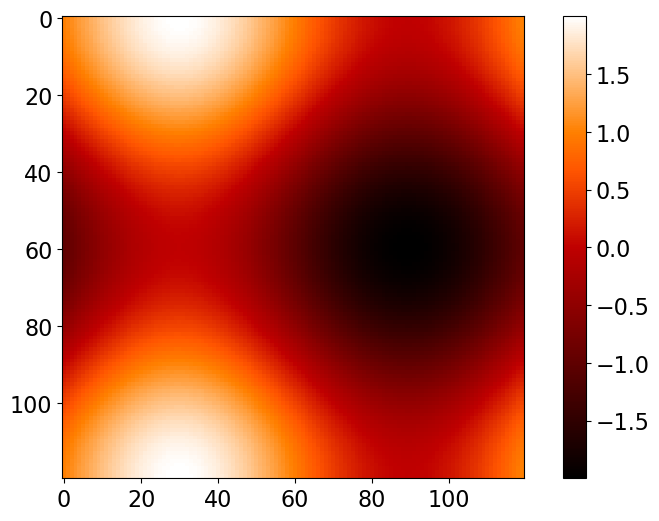

In [64]:
from matplotlib.colors import LogNorm

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)

im = plt.imshow(np.sin(x) + np.cos(y), cmap='gist_heat') #, clim=(-0.5, 0.5)) #, norm=LogNorm())
plt.colorbar();

## Shapes

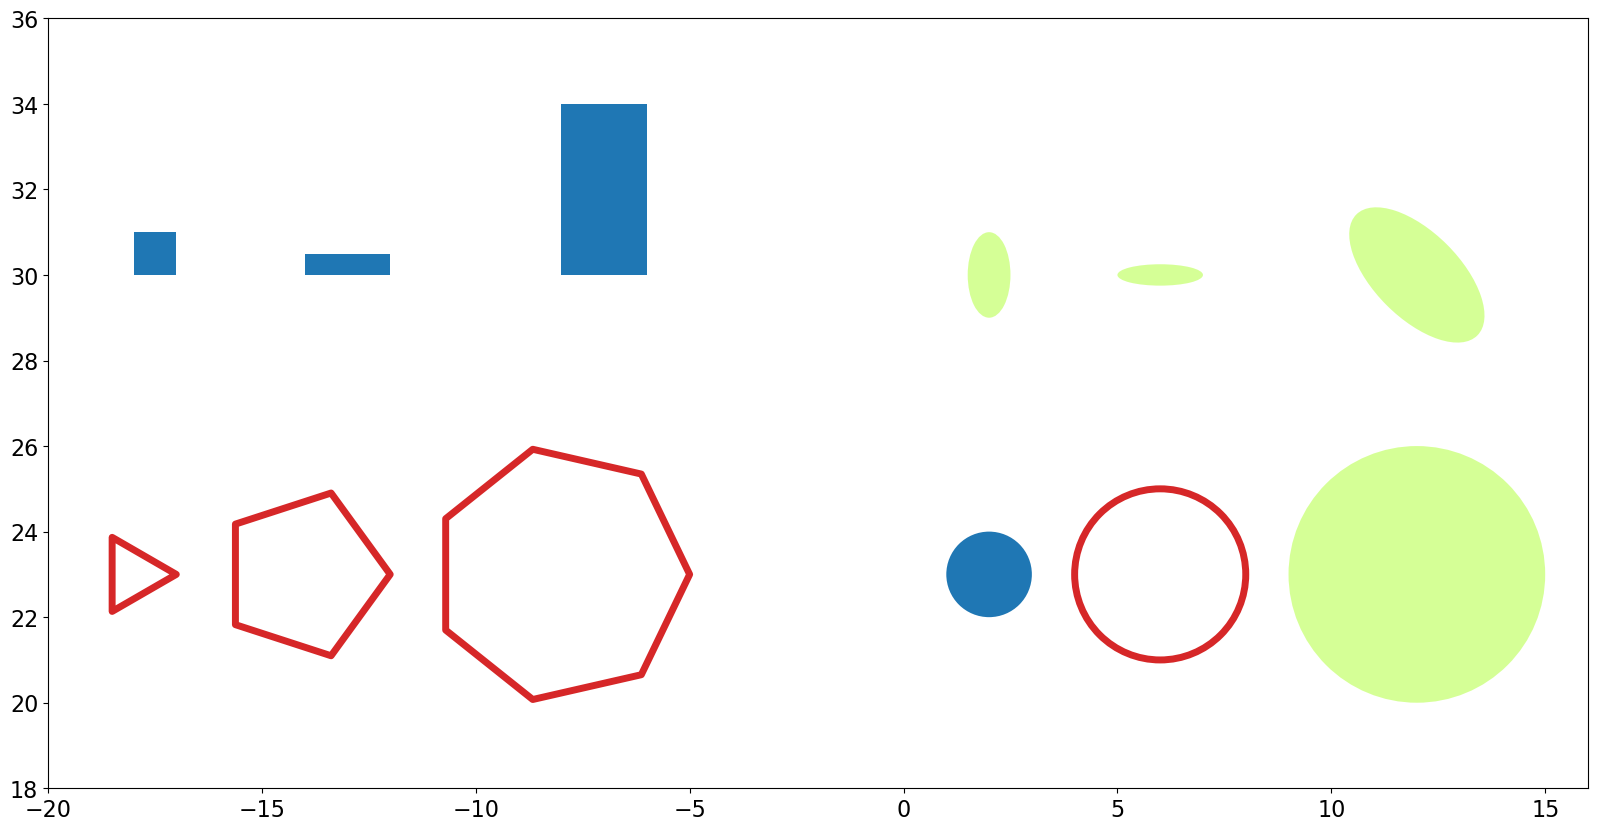

In [65]:
from matplotlib.patches import Circle, Ellipse, Rectangle, Polygon
from matplotlib.collections import PatchCollection

# Fixing random state for reproducibility
np.random.seed(19680801)


kwargs1 = {}
kwargs2 = {'facecolor': 'None',
          'edgecolor': 'tab:red',
          'linewidth': 5}
kwargs3 = {'hatch': '*',
          'fc': 'None'}
kwargs3 = {'fc': 'greenyellow',
          'alpha': 0.5}

fig, ax = plt.subplots(figsize=(20, 10))

# Rectangles: all patches have the same style 
patch_list = []
hr = 30
wr = -20
patch_list.append(Rectangle((wr + 2, hr), 1, 1))
patch_list.append(Rectangle((wr + 6, hr), 2, 0.5))
patch_list.append(Rectangle((wr + 12, hr), 2, 4))
p = PatchCollection(patch_list, **kwargs1)
ax.add_collection(p)

# Polygon: all patches have the same style
patch_list = []
hr = 23
wr = -20
xor = [wr + i for i in [2, 6, 12]]
radius = [1, 2, 3]
for ind, nside in enumerate([3, 5, 7]):
    points = [(xor[ind] + radius[ind]*np.cos(2*np.pi*i/nside),
               hr + radius[ind]*np.sin(2*np.pi*i/nside))
               for i in range(nside)]
    patch_list.append(Polygon(points))
p = PatchCollection(patch_list, **kwargs2)
ax.add_collection(p)


# Ellipse: all patches have the same style 
patch_list = []
hel = 30
we = 0
patch_list.append(Ellipse((we + 2, hel), 1, 2))
patch_list.append(Ellipse([we + 6, hel], 2, 0.5))
patch_list.append(Ellipse([we + 12, hel], 2, 4, angle=45))
p = PatchCollection(patch_list, **kwargs3)
ax.add_collection(p)

# Circle: each patch is independent
hc = 23
wc = 0
ax.add_patch(Circle([wc + 2, hc], 1, **kwargs1))
ax.add_patch(Circle([wc + 6, hc], 2, **kwargs2))
ax.add_patch(Circle([wc + 12, hc], 3, **kwargs3))

ax.set_xlim(-20, 16)
ax.set_ylim(18, 36)
ax.set_aspect('equal')
    

<a id=box_plot></a>
## Box plots

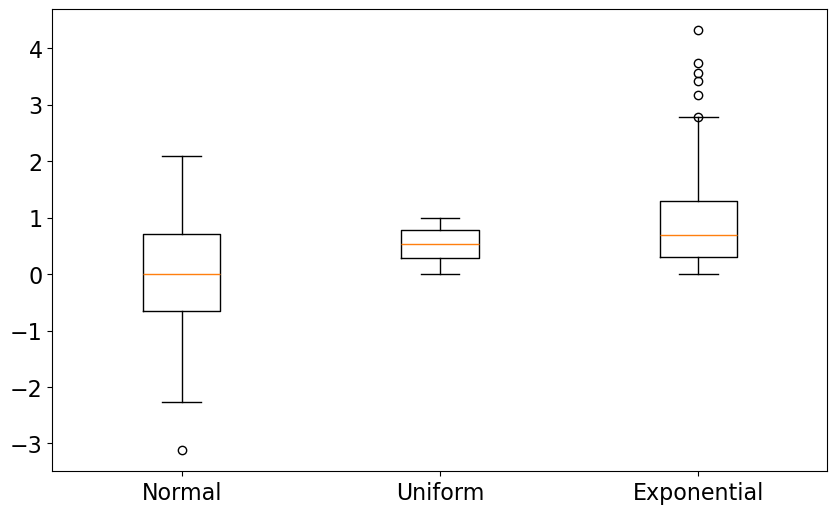

In [66]:
s1 = np.random.normal(size=100)
s2 = np.random.uniform(size=100)
s3 = np.random.exponential(size=100)
plt.boxplot([s1, s2, s3], labels=['Normal', 'Uniform', 'Exponential']);

<a id=pie_chart></a>
## Pie charts

In [99]:
# Select data from a specific year and add it up
year = 2023
year_mask = df_daily.year == year
dropped_columns = ['year', 'month', 'day', 'TotalGeneration']
totals_year = (df_daily[year_mask].sum().drop(dropped_columns)/1000)

# Get sorted renewable sources totals
totals_renewable_all = totals_year[renewable].sort_values(ascending=False)
totals_renewable = totals_renewable_all[:3]
totals_renewable['OtherRenewables'] = totals_renewable_all[3:].sum()

# Get sorted non-renewable sources totals
totals_nonrenewable_all = totals_year[non_renewable].sort_values(ascending=False)
totals_nonrenewable = totals_nonrenewable_all[:3]
totals_nonrenewable['OtherNonRenewables'] = totals_nonrenewable_all[3:].sum()

# Concatenate renewable and non renewable
totals_summary = pd.concat([totals_renewable, totals_nonrenewable])
totals_summary

Wind                  62649.356112
SolarPhotovoltaic     37471.689243
Hydro                 25329.682477
OtherRenewables        9153.758347
Nuclear               54275.902946
CombinedCycle         46050.401650
Cogeneration          17314.314083
OtherNonRenewables    14874.957415
dtype: float64

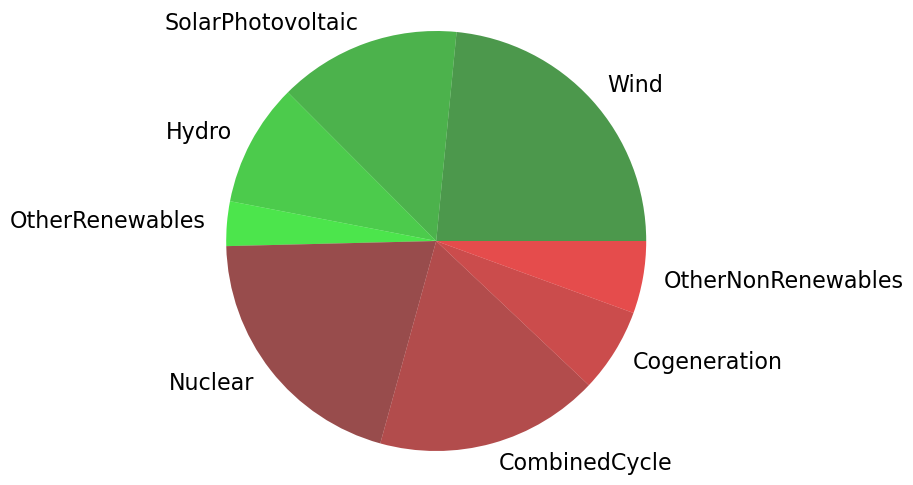

In [104]:
# Custom colors: renewable=green, non-renewable=red
pie_colors = [(0, (i + 3)/7., 0, 0.7) for i in range(4)] + \
    [((i + 3)/7., 0, 0, 0.7) for i in range(4)] #RGB color specification

fig, ax = plt.subplots()
ax.pie(totals_summary, labels=totals_summary.index, colors=pie_colors)
ax.axis('equal');

<a id=3d_plots></a>
## 3D Plots

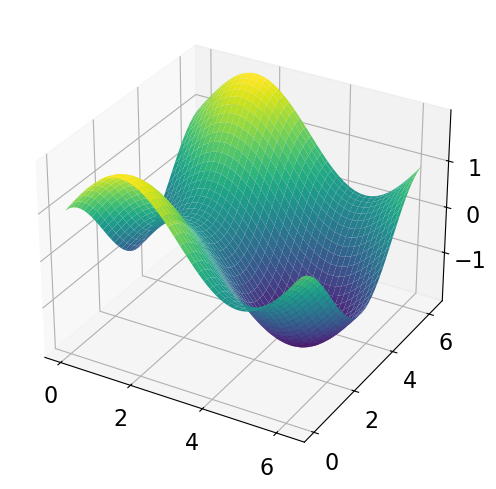

In [105]:
import mpl_toolkits.mplot3d.axes3d as p3
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)
z = np.sin(x) + np.cos(y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Additional concepts

## Projections

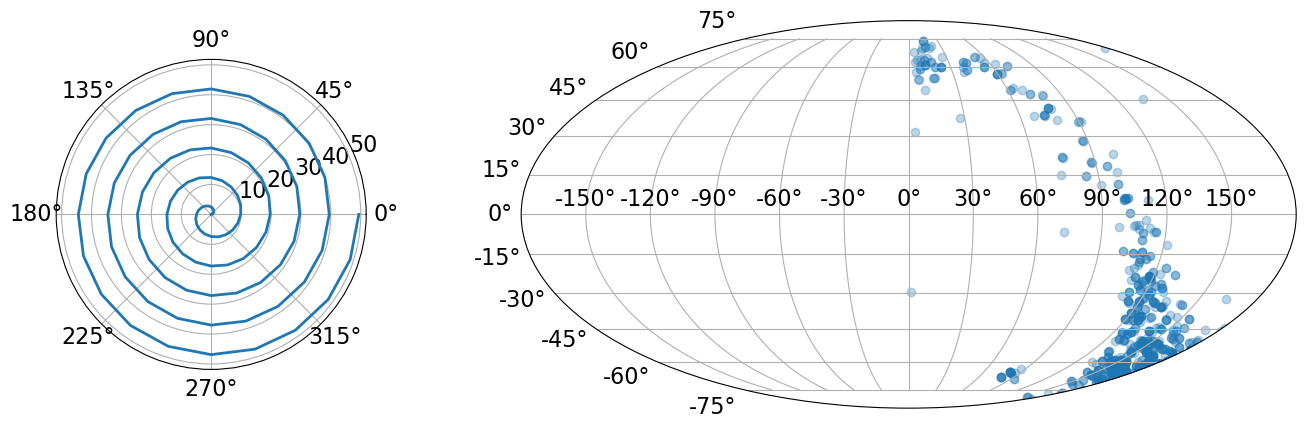

In [107]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 3, wspace=0.5)

theta = np.linspace(0, 5*2*np.pi, 101)
r = theta/2*np.pi

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(gs[0], projection='polar')
ax1.plot(theta, r)

gaia_csv = os.path.join(path_to_the_repo, 'resources', 'GaiaDR2.csv')
gaia_data = np.loadtxt(gaia_csv, delimiter=',', skiprows=11)
ax2 = fig.add_subplot(gs[1:], projection='mollweide')
ax2.scatter(np.deg2rad(gaia_data[:, 0]), np.deg2rad(gaia_data[:, 1]), alpha=0.3)
ax2.grid()


<a id=plot_styles></a>
## Plot styles

List available styles:

In [109]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


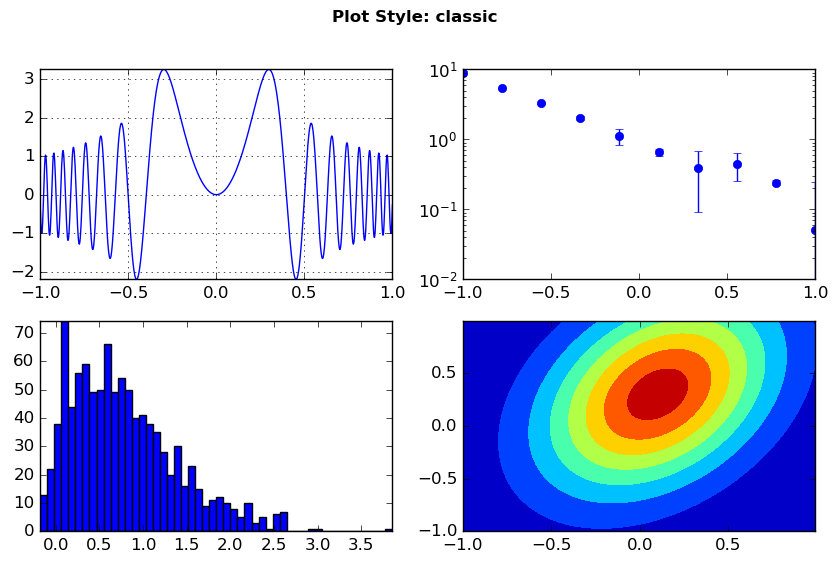

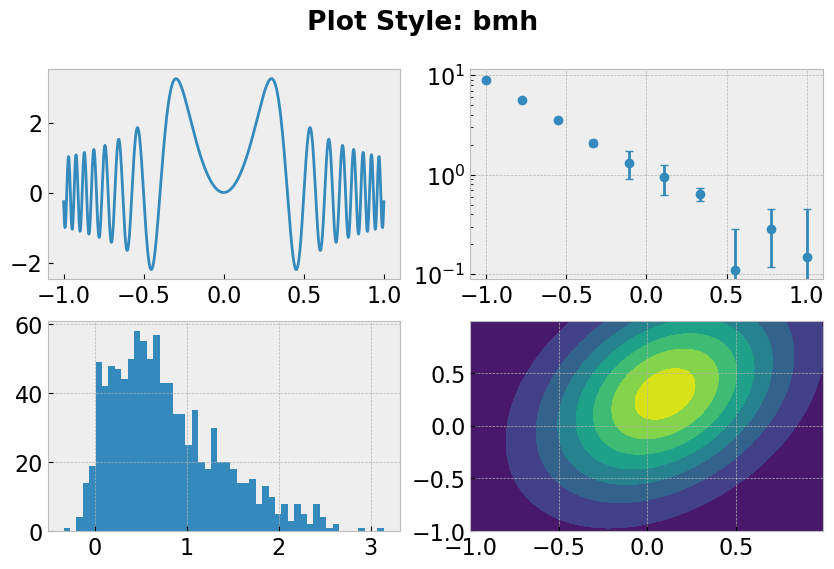

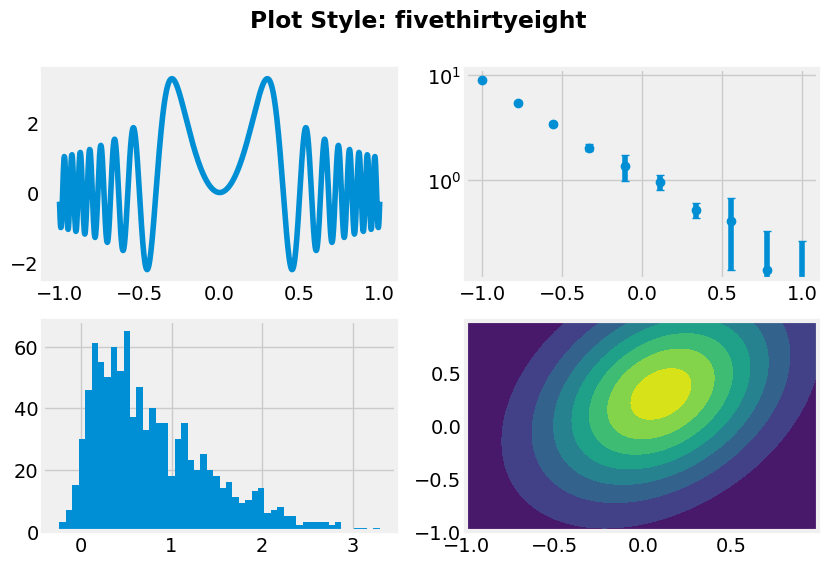

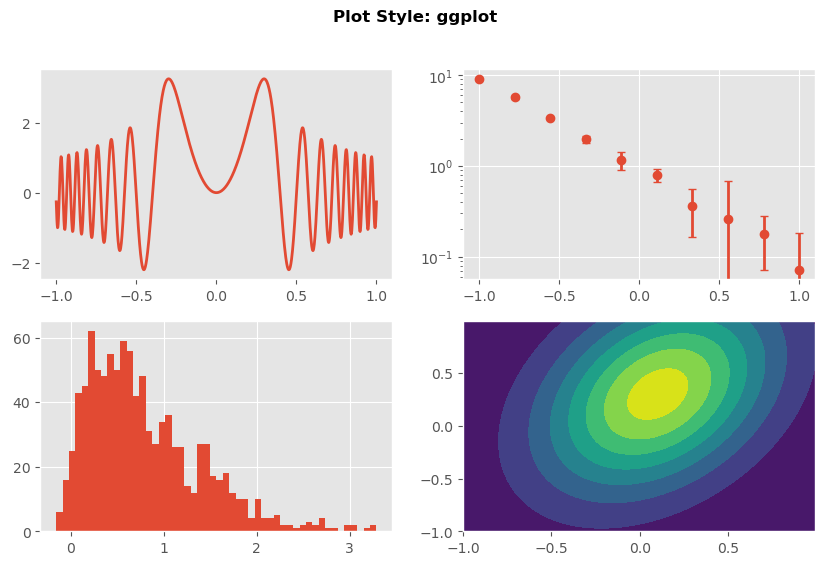

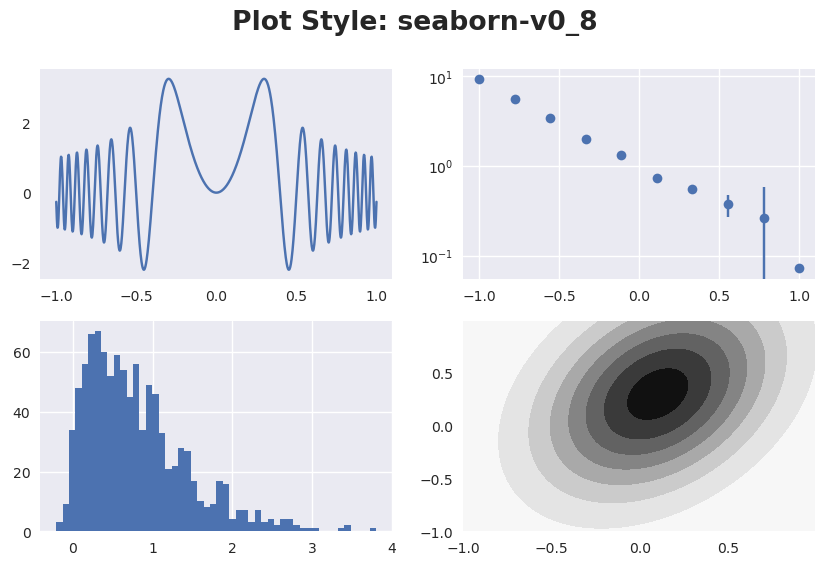

In [110]:
from scipy import stats

def plot_stuff():
    plt.subplot(2, 2, 1)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, np.sin(50*x**3)/(x))
    plt.grid()

    plt.subplot(2, 2, 2)
    x = np.linspace(-1, 1, 10)
    y = np.exp(-2.2*x) + np.random.normal(0, 0.1, 10)
    yerr = np.abs(np.random.normal(0, 0.2, 10))
    plt.errorbar(x, y, yerr, fmt='o', capsize=3)
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    x = stats.skewnorm.rvs(10, size=1000)
    plt.hist(x, bins=50)

    plt.subplot(2, 2, 4)
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
    plt.contourf(x, y, z.pdf(pos))

for plot_style in ['classic', 'bmh', 'fivethirtyeight', 'ggplot', 'seaborn-v0_8']:
    plt.figure()
    with plt.style.context(plot_style):   # use context manager so that changes are temporary
        plot_stuff()
        plt.suptitle('Plot Style: ' + plot_style, fontweight='bold')

<a id=save_figures></a>
## Saving figures

Use `plt.savefig` to save your figure.

You can either give path relative to your working directory or an absolute path.
Not sure what the current working directory is?

In [111]:
pwd()

'/home/torradeflot/Projects/PythonMasterIFAE'

In [ ]:
x = np.linspace(-5, 5)
plt.plot(x, x**3, marker='s')
plt.title("My Awesome Plot")
plot_folder = Path('plots')

# save in dedicated directory; extension determines file type
plt.savefig(plot_folder / 'awesome_plot.pdf')
plt.savefig(plot_folder / 'awesome_plot.eps')
plt.savefig(plot_folder / 'awesome_plot.png', dpi=300)
plt.savefig(plot_folder / 'awesome_plot.jpg', dpi=300)

# absolute path
# plt.savefig('/path/to/output/directory/awesome_plot.pdf')

<a id=animations></a>
## Animations

To run the examples you may have to install ffmpeg

In [ ]:
# Uncomment the line below and run the cell
!pip install ffmpeg-python

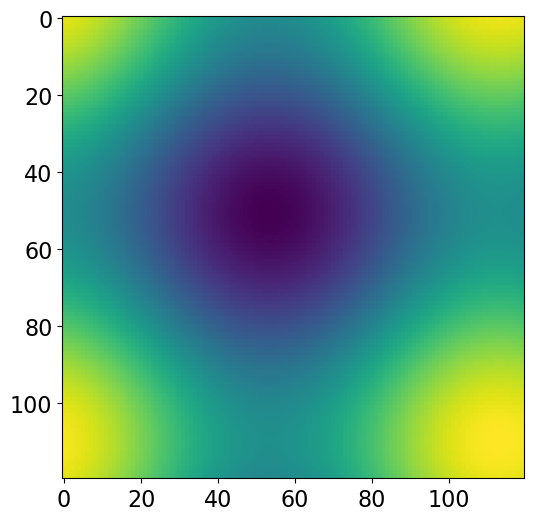

In [112]:
import matplotlib.animation as animation

class FunctionAnimatedImage():
    
    def func(self):
        return np.sin(self.x) + np.cos(self.y)
    
    def __init__(self):
        self.x = np.linspace(0, 2 * np.pi, 120)
        self.y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)

        self.im = plt.imshow(self.func(), animated=True)
        
    def next_frame(self, i, *args):
        
        self.x += np.pi / 5.
        self.y += np.pi / 20.
        self.im.set_array(self.func())
        return self.im,

fig = plt.figure()
anim_img = FunctionAnimatedImage()

# Animate the image by recursively calling the next_frame function
ani_1 = animation.FuncAnimation(fig, anim_img.next_frame, frames=40, interval=50, blit=True)

# Embed the video in an html 5.0 video tag
HTML(ani_1.to_html5_video())

# Alternative plotting libraries

## Seaborn

High-level plotting library on top of maplotlib

In [6]:
import seaborn as sns

In [7]:
np.random.seed(1234)

v1 = np.random.normal(0, 10, 1000)
v2 = 2*v1 + np.random.normal(60, 15, 1000)

In [8]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

In [9]:
grid = sns.jointplot(x=v1, y=v2, alpha=0.4);
#grid.ax_joint.set_aspect('equal')

And much more ... https://seaborn.pydata.org/

## Bokeh 

Python library to produce interactive plots

https://docs.bokeh.org/en/latest/index.html

In [117]:
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import HoverTool
from bokeh.plotting import figure 
output_notebook()

Loading BokehJS ...

In [119]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = np.array([(r, g, 150) for r, g in zip(50+2*x, 30+2*y)], dtype="uint8")

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"

p = figure(tools=TOOLS)

p.circle(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)

show(p, notebook_handle=True)

## plotly

https://plotly.com/python/

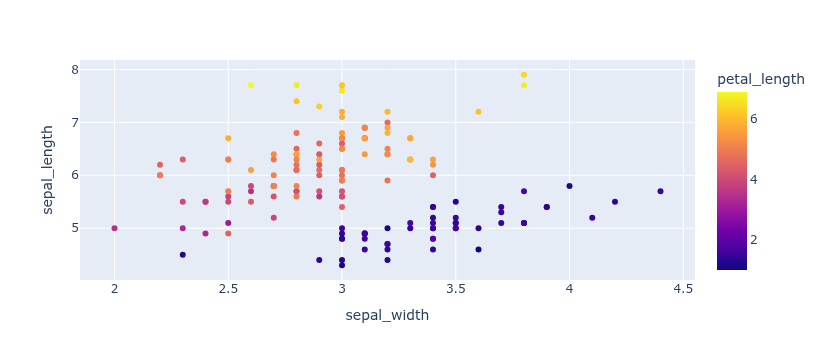

In [120]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color='petal_length')
fig.show()

# Interactive plotting

## with ipympl

By changing the backend ( %matplotlib inline -> %matplotlib ipympl ) . We will already have interactive exploration for free.

Change the backend, restart the notebook and regenerate any of the previous plots

The data in the plots can be dynamically updated.

You may have to install `ipympl` if it is not already installed

In [ ]:
# To install ipympl uncomment the following line and run the cell
#!pip install ipympl

In [5]:
# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…

<a id=exercise_3></a>
# Exercise 3

Load the file `resources/nip.fits` using fits.
```
hdul = fits.open('resources/nip.fits')
```

Plot the matrix in `hdul[1].data` with imshow. You won't see much.

Do a histogram (Hint: use the `log` argument) to analyze the values in the matrix.

Use imshow (with `norm`) to see what's inside the plot.

Use `imshow` + `clim` to see a higher detail of the background.

Put everything in a single figure mith multiple axes

In [123]:
# %load -r 110-135 /home/torradeflot/Projects/PythonMasterIFAE/matplotlib/matplotlib_solutions.py